# k-means demo

In [10]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

# import librarys
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv("iris.csv", header=0, index_col=0)
dataset.head()


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#对类别进行编码，3个类别分别赋值0，1，2
dataset['class'][dataset['class']=='Iris-setosa']=0
dataset['class'][dataset['class']=='Iris-versicolor']=1
dataset['class'][dataset['class']=='Iris-virginica']=2


/home/bushuhui/.virtualenv/fintech/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/bushuhui/.virtualenv/fintech/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bushuhui/.virtualenv/fintech/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after r

In [8]:
def originalDatashow(dataSet):
    #绘制原始的样本点
    num,dim=shape(dataSet)
    marksamples=['ob'] #样本图形标记
    for i in range(num):
        plt.plot(datamat.iat[i,0],datamat.iat[i,1],marksamples[0],markersize=5)
    plt.title('original dataset')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width') 
    plt.show()
    

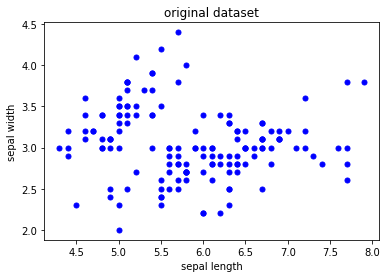

In [21]:
#获取样本数据
datamat = dataset.loc[:, ['sepal-length', 'sepal-width']]
# 真实的标签
labels = dataset.loc[:, ['class']]
#原始数据显示
originalDatashow(datamat)



In [12]:
def randChosenCent(dataSet,k):
    """初始化聚类中心：通过在区间范围随机产生的值作为新的中心点"""

    # 样本数
    m=shape(dataSet)[0]
    # 初始化列表
    centroidsIndex=[]
    #生成类似于样本索引的列表
    dataIndex=list(range(m))
    for i in range(k):
        #生成随机数
        randIndex=random.randint(0,len(dataIndex))
        #将随机产生的样本的索引放入centroidsIndex
        centroidsIndex.append(dataIndex[randIndex])
        #删除已经被抽中的样本
        del dataIndex[randIndex]
    #根据索引获取样本
    centroids = dataSet.iloc[centroidsIndex]
    return mat(centroids)

In [15]:

def distEclud(vecA, vecB):
    """算距离, 两个向量间欧式距离"""
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)


def kMeans(dataSet, k):
    # 样本总数
    m = shape(dataSet)[0]
    # 分配样本到最近的簇：存[簇序号,距离的平方] (m行 x 2 列)
    clusterAssment = mat(zeros((m, 2)))

    # step1: 通过随机产生的样本点初始化聚类中心
    centroids = randChosenCent(dataSet, k)
    print('最初的中心=', centroids)

    # 标志位，如果迭代前后样本分类发生变化值为Tree，否则为False
    clusterChanged = True
    # 查看迭代次数
    iterTime = 0
    
    # 所有样本分配结果不再改变，迭代终止
    while clusterChanged:
        clusterChanged = False
        
        # step2:分配到最近的聚类中心对应的簇中
        for i in range(m):
            # 初始定义距离为无穷大
            minDist = inf;
            # 初始化索引值
            minIndex = -1
            # 计算每个样本与k个中心点距离
            for j in range(k):
                # 计算第i个样本到第j个中心点的距离
                distJI = distEclud(centroids[j, :], dataSet.values[i, :])
                # 判断距离是否为最小
                if distJI < minDist:
                    # 更新获取到最小距离
                    minDist = distJI
                    # 获取对应的簇序号
                    minIndex = j
            # 样本上次分配结果跟本次不一样，标志位clusterChanged置True
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssment[i, :] = minIndex, minDist ** 2  # 分配样本到最近的簇
            
        iterTime += 1
        sse = sum(clusterAssment[:, 1])
        print('the SSE of %d' % iterTime + 'th iteration is %f' % sse)
        
        # step3:更新聚类中心
        for cent in range(k):  # 样本分配结束后，重新计算聚类中心
            # 获取该簇所有的样本点
            ptsInClust = dataSet.iloc[nonzero(clusterAssment[:, 0].A == cent)[0]]
            # 更新聚类中心：axis=0沿列方向求均值。
            centroids[cent, :] = mean(ptsInClust, axis=0)
    return centroids, clusterAssment


In [16]:
# 进行k-means聚类
k = 3  # 用户定义聚类数
mycentroids, clusterAssment = kMeans(datamat, k)

最初的中心= [[5.  3.5]
 [4.9 2.4]
 [7.1 3. ]]
the SSE of 1th iteration is 68.800000
the SSE of 2th iteration is 41.374283
the SSE of 3th iteration is 38.641949
the SSE of 4th iteration is 38.030526
the SSE of 5th iteration is 37.513984
the SSE of 6th iteration is 37.174201
the SSE of 7th iteration is 37.136261
the SSE of 8th iteration is 37.123702


In [17]:
def datashow(dataSet, k, centroids, clusterAssment):  # 二维空间显示聚类结果
    from matplotlib import pyplot as plt
    num, dim = shape(dataSet)  # 样本数num ,维数dim

    if dim != 2:
        print('sorry,the dimension of your dataset is not 2!')
        return 1
    marksamples = ['or', 'ob', 'og', 'ok', '^r', '^b', '<g']  # 样本图形标记
    if k > len(marksamples):
        print('sorry,your k is too large,please add length of the marksample!')
        return 1
        # 绘所有样本
    for i in range(num):
        markindex = int(clusterAssment[i, 0])  # 矩阵形式转为int值, 簇序号
        # 特征维对应坐标轴x,y；样本图形标记及大小
        plt.plot(dataSet.iat[i, 0], dataSet.iat[i, 1], marksamples[markindex], markersize=6)

    # 绘中心点
    markcentroids = ['o', '*', '^']  # 聚类中心图形标记
    label = ['0', '1', '2']
    c = ['yellow', 'pink', 'red']
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], markcentroids[i], markersize=15, label=label[i], c=c[i])
        plt.legend(loc='upper left')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')

    plt.title('k-means cluster result')  # 标题
    plt.show()
    
    
# 画出实际图像
def trgartshow(dataSet, k, labels):
    from matplotlib import pyplot as plt

    num, dim = shape(dataSet)
    label = ['0', '1', '2']
    marksamples = ['ob', 'or', 'og', 'ok', '^r', '^b', '<g']
    # 通过循环的方式，完成分组散点图的绘制
    for i in range(num):
        plt.plot(datamat.iat[i, 0], datamat.iat[i, 1], marksamples[int(labels.iat[i, 0])], markersize=6)
    for i in range(0, num, 50):
        plt.plot(datamat.iat[i, 0], datamat.iat[i, 1], marksamples[int(labels.iat[i, 0])], markersize=6,
                 label=label[int(labels.iat[i, 0])])
    plt.legend(loc='upper left')
    
    # 添加轴标签和标题
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.title('iris true result')  # 标题

    # 显示图形
    plt.show()
    # label=labels.iat[i,0]

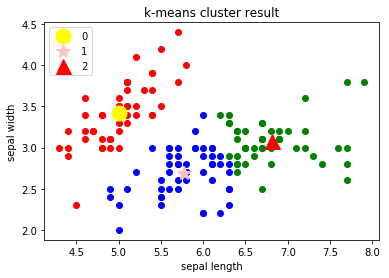

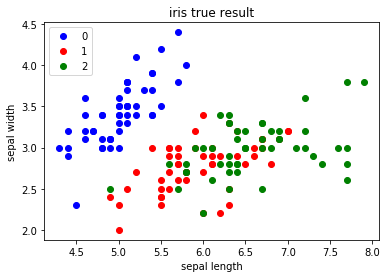

In [18]:
# 绘图显示
datashow(datamat, k, mycentroids, clusterAssment)
trgartshow(datamat, 3, labels)